***Install Libraries***

In [ ]:
import pandas as pd
import numpy as np

#visulazation
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
data=pd.read_csv('/content/Monkeypox Coursework Dataset.csv')

**Take required columns which User can specify for Instant PCR Results without any lab values for e.g. Red blood Cells Count**
Considering you are aware about HIV & STI

In [ ]:
df =data.drop(['Test ID','Systemic Illness','Red blood cells count','White blood cells count','Home ownership','Month of Birth','Health Insurance'], axis=1)

In [ ]:
df.head()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1,1.0,1,0,1.0,0.0,37,0.0,Negative
1,1.0,1.0,0,1.0,1,0,0.0,1.0,24,0.0,Positive
2,1.0,0.0,1,1.0,0,0,0.0,1.0,34,0.0,Positive
3,0.0,1.0,0,0.0,0,1,1.0,1.0,40,0.0,Positive
4,3.0,1.0,1,1.0,0,0,1.0,1.0,36,0.0,Positive


In [ ]:
# statistical description
df.describe()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
count,24998.000000,24997.000000,25000.000000,24994.000000,25000.000000,24993.000000,24995.000000,24996.000000
mean,1.497640,0.493819,0.502160,0.504441,0.501080,0.501260,0.503301,0.497880
std,1.116872,0.499972,0.500005,0.499990,0.500009,0.500008,0.499999,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24998 non-null  float64
 1   Rectal Pain                     24997 non-null  float64
 2   Sore Throat                     25000 non-null  int64  
 3   Penile Oedema                   24994 non-null  float64
 4   Oral Lesions                    24996 non-null  object 
 5   Solitary Lesion                 25000 non-null  int64  
 6   Swollen Tonsils                 24993 non-null  float64
 7   HIV Infection                   24995 non-null  float64
 8   Age                             24964 non-null  object 
 9   Sexually Transmitted Infection  24996 non-null  float64
 10  MPOX PCR Result                 25000 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 2.1+ MB


In [ ]:
# measurement scale type
df.dtypes

Encoded Systemic Illness          float64
Rectal Pain                       float64
Sore Throat                         int64
Penile Oedema                     float64
Oral Lesions                       object
Solitary Lesion                     int64
Swollen Tonsils                   float64
HIV Infection                     float64
Age                                object
Sexually Transmitted Infection    float64
MPOX PCR Result                    object
dtype: object

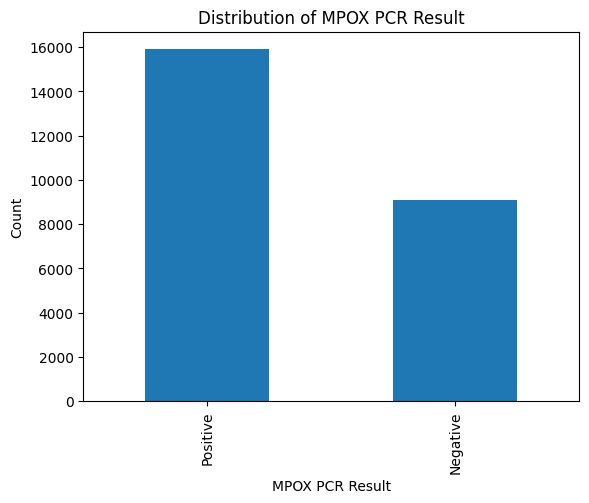

In [ ]:
# distribution of class variable: using Count
df['MPOX PCR Result'].value_counts().plot(kind='bar')
plt.title("Distribution of MPOX PCR Result")
plt.xlabel("MPOX PCR Result")
plt.ylabel("Count")
plt.show()

**Check For Null**

In [ ]:
df.isnull().sum()

Encoded Systemic Illness           2
Rectal Pain                        3
Sore Throat                        0
Penile Oedema                      6
Oral Lesions                       4
Solitary Lesion                    0
Swollen Tonsils                    7
HIV Infection                      5
Age                               36
Sexually Transmitted Infection     4
MPOX PCR Result                    0
dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Encoded Systemic Illness          0.008
Rectal Pain                       0.012
Sore Throat                       0.000
Penile Oedema                     0.024
Oral Lesions                      0.016
Solitary Lesion                   0.000
Swollen Tonsils                   0.028
HIV Infection                     0.020
Age                               0.144
Sexually Transmitted Infection    0.016
MPOX PCR Result                   0.000
dtype: float64

**Consider Categorical Values**

In [ ]:
columns = ['Encoded Systemic Illness','Rectal Pain','Penile Oedema','Oral Lesions','Swollen Tonsils','HIV Infection','Sexually Transmitted Infection']

In [ ]:
#finding unique values
for i in columns:
  na_vals= df[i].value_counts(dropna=False)
  print("-"*100)
  print(f"Count for each group value in column '{i}':")
  print("-"*100)
  print(na_vals)
  print("-"*100)
  # print("\n")

----------------------------------------------------------------------------------------------------
Count for each group value in column 'Encoded Systemic Illness':
----------------------------------------------------------------------------------------------------
1.0    6382
3.0    6252
0.0    6214
2.0    6150
NaN       2
Name: Encoded Systemic Illness, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Count for each group value in column 'Rectal Pain':
----------------------------------------------------------------------------------------------------
0.0    12653
1.0    12344
NaN        3
Name: Rectal Pain, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


Oral Lesions Contains 'Yes' or 'No'. Let's replaced with 1 or 0 respectively.

In [ ]:
df['Oral Lesions'] = df['Oral Lesions'].str.lower().replace({'yes': 1, 'no': 0})

In [ ]:
df['Oral Lesions'].value_counts(dropna=False)

0      12504
1      12481
0          7
NaN        4
1          4
Name: Oral Lesions, dtype: int64

In [ ]:
# to convert to right column type , we need to handle NAN which is floating type
#df['Oral Lesions'] = df['Oral Lesions'].astype('float64')
#this is to converting column to int and handling NAN values as int type
df['Oral Lesions'] = pd.to_numeric(df['Oral Lesions'], errors='coerce').astype('Int64')

In [ ]:
df['Oral Lesions'].value_counts(dropna=False)

0       12511
1       12485
<NA>        4
Name: Oral Lesions, dtype: Int64

In [ ]:
#simple mode shows the highest frequency in that column
for i in columns:
  mode_columns= df[i].mode()
  print("-"*100)
  print(f"Simple Mode for each column '{i}':")
  print("-"*100)
  print(mode_columns)
  print("-"*100)
  # print("\n")

----------------------------------------------------------------------------------------------------
Simple Mode for each column 'Encoded Systemic Illness':
----------------------------------------------------------------------------------------------------
0    1.0
Name: Encoded Systemic Illness, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Simple Mode for each column 'Rectal Pain':
----------------------------------------------------------------------------------------------------
0    0.0
Name: Rectal Pain, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Simple Mode for each column 'Penile Oedema':
--------------------------------------------------

**Check Class Distribution Percentage**

In [ ]:
# Loop over columns and calculate the percentage for each unique value with respect to class variable
for i in columns:
    percentage_df = df.groupby('MPOX PCR Result')[i].value_counts(normalize=True).unstack() * 100
    print("-"*100)
    print(f"Percentage DataFrame for '{i}':")
    print("-"*100)
    print(percentage_df)
    print("-"*100)
    # print("\n")

----------------------------------------------------------------------------------------------------
Percentage DataFrame for 'Encoded Systemic Illness':
----------------------------------------------------------------------------------------------------
Encoded Systemic Illness        0.0        1.0        2.0        3.0
MPOX PCR Result                                                     
Negative                  31.796677  17.625701  32.192760  18.384861
Positive                  20.893834  30.045886  20.265259  28.795022
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Percentage DataFrame for 'Rectal Pain':
----------------------------------------------------------------------------------------------------
Rectal Pain            0.0        1.0
MPOX PCR Result                      
Negative         59.922992  40.077008
Positive    

**Visualization**

In [ ]:
num_rows = len(df.columns) // 2 + len(df.columns) % 2
num_rows

6

**Find Distribution - Bernoulli distribution - Binary & categorical values**

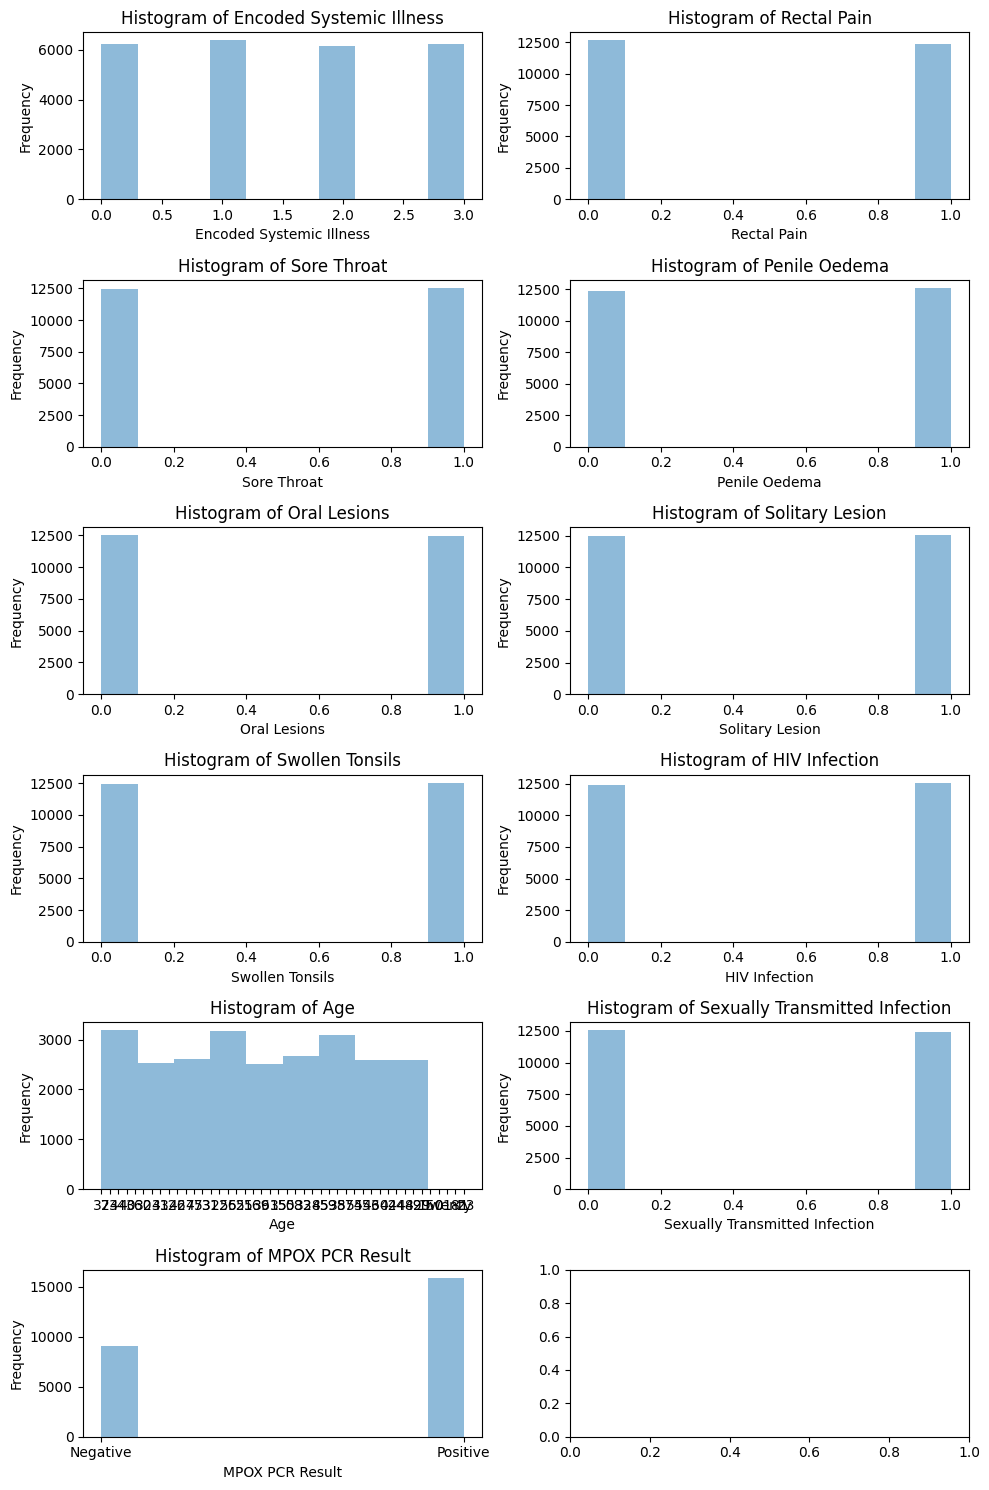

In [ ]:
# Set up a 1x3 grid for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 15))

# Flatten the axes array to handle different numbers of rows and columns
axes = axes.flatten()

# Iterate through columns and plot histograms
for i, column in enumerate(df.columns):
    axes[i].hist(df[column].dropna(), bins=10, alpha=0.5)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

***Calculate mode for each column with respect to the class variable MPOX PCR Result & Impute***

In [ ]:
for i in columns:
  mode_by_class = df.groupby('MPOX PCR Result')[i].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Impute missing values in each column with the mode based on class
  df[i] = df.apply(lambda row: mode_by_class[row['MPOX PCR Result']] if pd.isna(row[i]) else row[i], axis=1)

In [ ]:
for i in columns:
  na_vals= df[i].value_counts(dropna=False)
  print("-"*100)
  print(f"Count for each group value in column after imputing missing values '{i}':")
  print(na_vals)
  print("-"*100)
  # print("\n")

----------------------------------------------------------------------------------------------------
Count for each group value in column after imputing missing values 'Encoded Systemic Illness':
1.0    6382
3.0    6252
0.0    6214
2.0    6152
Name: Encoded Systemic Illness, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Count for each group value in column after imputing missing values 'Rectal Pain':
0.0    12654
1.0    12346
Name: Rectal Pain, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Count for each group value in column after imputing missing values 'Penile Oedema':
1.0    12612
0.0    12388
Name: Penile Oedema, dtype: int64
-----------------------

**Continuous Variable - Age**

In [ ]:
unique_values = df['Age'].unique()

# Print or further process the unique values
print("Unique values in the Age column:", unique_values)

Unique values in the Age column: ['37' '24' '34' '40' '36' '30' '23' '41' '32' '46' '27' '47' '53' '31'
 '25' '26' '52' '51' '56' '39' '61' '35' '50' '58' '33' '28' '45' nan '59'
 '38' '57' '54' '55' '43' '60' '42' '44' '48' '49' '29' '150' '0' 'Twenty'
 '181' '-23']


In [ ]:
#Only Twenty Word found, let's replace the String Value to Number
df['Age'] = df['Age'].replace('Twenty', 20)

In [ ]:
unique_values = df['Age'].unique()

# Print or further process the unique values
print("Unique values in the Age column:", unique_values)

Unique values in the Age column: ['37' '24' '34' '40' '36' '30' '23' '41' '32' '46' '27' '47' '53' '31'
 '25' '26' '52' '51' '56' '39' '61' '35' '50' '58' '33' '28' '45' nan '59'
 '38' '57' '54' '55' '43' '60' '42' '44' '48' '49' '29' '150' '0' 20 '181'
 '-23']


**Outliers**

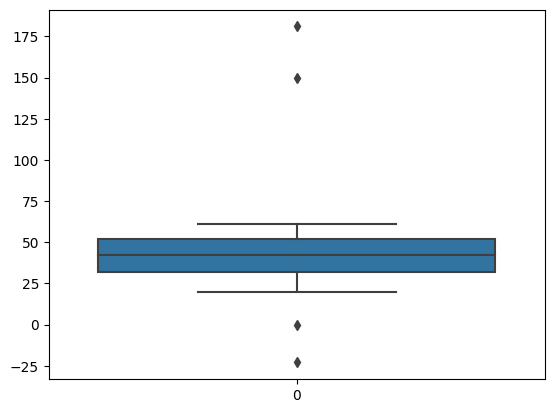

In [ ]:
#box plot to show outliers
sns.boxplot(df['Age'])

# Show the plot
plt.show()


**Remove Outliers by Replaceing with Mean Value**

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [ ]:
# Calculate the mean for the filtered values
mean_filtered = df['Age'].mean()
print('Mean:', mean_filtered)
r_mean=round(int(mean_filtered))
print('Round of Mean:', r_mean)

Mean: 42.06100785130588
Round of Mean: 42


In [ ]:
median_age = df['Age'].median()
median_age

42.0

In [ ]:
df['Age'].isnull().sum()

36

In [ ]:
# Replace values greater than 100 and less than 1 with NaN
df['Age'] = np.where((df['Age'] < 1) | (df['Age'] > 100), np.nan, df['Age'])

# Replace missing values and values outside the desired range with the median age as Median and Mean are same value 42
#median_age = df['Age'].median()
#df['Age'] = df['Age'].fillna(median_age)

df['Age'] = df['Age'].fillna(r_mean)



In [ ]:
unique_values = df['Age'].unique()

# Print or further process the unique values
print("Unique values in the Age column:", unique_values)

Unique values in the Age column: [37. 24. 34. 40. 36. 30. 23. 41. 32. 46. 27. 47. 53. 31. 25. 26. 52. 51.
 56. 39. 61. 35. 50. 58. 33. 28. 45. 42. 59. 38. 57. 54. 55. 43. 60. 44.
 48. 49. 29. 20.]


**Convert to Integer Data Type**

In [ ]:
df['Encoded Systemic Illness'] = pd.to_numeric(df['Encoded Systemic Illness'], errors='coerce').astype('Int64')
df['Rectal Pain'] = pd.to_numeric(df['Rectal Pain'], errors='coerce').astype('Int64')
df['Penile Oedema'] = pd.to_numeric(df['Penile Oedema'], errors='coerce').astype('Int64')
df['Swollen Tonsils'] = pd.to_numeric(df['Swollen Tonsils'], errors='coerce').astype('Int64')
df['HIV Infection'] = pd.to_numeric(df['HIV Infection'], errors='coerce').astype('Int64')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')
df['Sexually Transmitted Infection'] = pd.to_numeric(df['Sexually Transmitted Infection'], errors='coerce').astype('Int64')

In [ ]:
df.isnull().sum()

Encoded Systemic Illness          0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Age                               0
Sexually Transmitted Infection    0
MPOX PCR Result                   0
dtype: int64

In [ ]:
df.dtypes

Encoded Systemic Illness           Int64
Rectal Pain                        Int64
Sore Throat                        int64
Penile Oedema                      Int64
Oral Lesions                       int64
Solitary Lesion                    int64
Swollen Tonsils                    Int64
HIV Infection                      Int64
Age                                Int64
Sexually Transmitted Infection     Int64
MPOX PCR Result                   object
dtype: object

In [ ]:
df.shape

(25000, 11)

**Pre-process DF save to CSV**

In [ ]:
#This will save the dataset without the raws indeces
df.to_csv(r'/content/Monkeypox.csv', index=False)

In [ ]:
df1= df.copy()

**Manual Label Encoding - Positive & Negative cases as 1 & 0 respectively**

In [ ]:
df1['MPOX PCR Result'] = df1['MPOX PCR Result'].map({'Positive': 1, 'Negative': 0})
df1.head()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection,MPOX PCR Result
0,0,0,1,1,1,0,1,0,37,0,0
1,1,1,0,1,1,0,0,1,24,0,1
2,1,0,1,1,0,0,0,1,34,0,1
3,0,1,0,0,0,1,1,1,40,0,1
4,3,1,1,1,0,0,1,1,36,0,1


In [ ]:
df1.to_csv(r'/content/Monkeypox01.csv', index=False)

**Read Pre-Process Data For Model Building**

In [ ]:
df1=pd.read_csv(r'/content/Monkeypox01.csv')

**#Task 4b says to use only categorical columns, so dropping Age column.**
Age is Continuous Variable

(array([1229., 2502., 2521., 2622., 2562., 2618., 2674., 2583., 2477.,
        3212.]),
 array([20. , 24.1, 28.2, 32.3, 36.4, 40.5, 44.6, 48.7, 52.8, 56.9, 61. ]),
 <BarContainer object of 10 artists>)

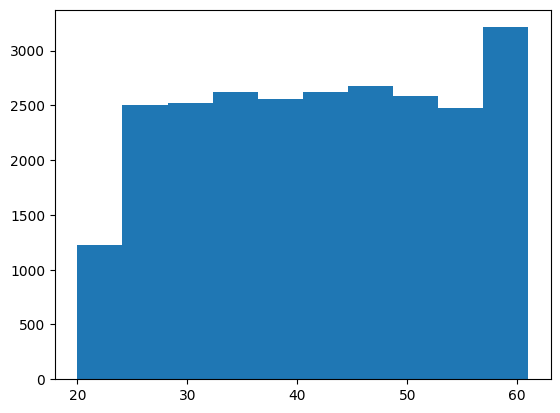

In [ ]:
plt.hist(df1['Age'])

**Features & Target**

In [ ]:
columns_to_drop=['Age','MPOX PCR Result']
#Features
X= df1.drop(columns_to_drop, axis=1)
#Target
y= df1['MPOX PCR Result']

In [ ]:
# Calculate class ratio
class_ratios = np.bincount(y) / len(y)

# Print the class ratios
for class_label, ratio in enumerate(class_ratios):
    print(f"Class {class_label}: {ratio:.2%}")

Class 0: 36.36%
Class 1: 63.64%


**Positive Class have 64% of Data And Negative Class have 36% of Data Creating a 80-20 Split will have more chance of Postive & Negative balanced data with startify**

In [ ]:
# Split dataset into training set and test set- 80% training and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
np.bincount(y_train)

array([ 7273, 12727])

In [ ]:
np.bincount(y_test)

array([1818, 3182])

**For Bernoulli distribution with Class 0 & 1 - We can use MinMax Scaler which will keep the range from (0-1)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X_val_scaled = scaler.transform(X_val)

In [ ]:
feature_names = X.columns
class_name = 'MPOX PCR Result'

print("Feature column names", feature_names)
print("Feature data shape",X.shape)
print('Class column name',class_name)
print("Class data shape",y.shape)
print('Taining Set',X_train.shape)
print('Testing Set',X_test.shape)

Feature column names Index(['Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection'],
      dtype='object')
Feature data shape (25000, 9)
Class column name MPOX PCR Result
Class data shape (25000,)
Taining Set (20000, 9)
Testing Set (5000, 9)


In [ ]:
# Store the Results of Each Model for Comparison
dfresults = pd.DataFrame()

**LogisticRegression**

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred_lr=logreg.predict(X_test_scaled)


Results for the LogisticRegression------
Recall Score - 0.9000628535512256
              precision    recall  f1-score   support

           0       0.62      0.28      0.39      1818
           1       0.69      0.90      0.78      3182

    accuracy                           0.68      5000
   macro avg       0.65      0.59      0.58      5000
weighted avg       0.66      0.68      0.64      5000



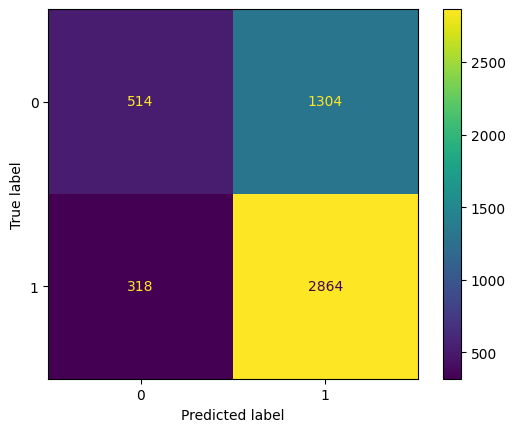

In [ ]:
# Evaluate the model
print("Results for the LogisticRegression------")
accuracy = classification_report(y_test, y_pred_lr)
rs_test = recall_score(y_test, y_pred_lr)
print("Recall Score - " + str(rs_test))
print(accuracy)

accuracy = classification_report(y_test, y_pred_lr,output_dict=True)
df_report = pd.DataFrame(accuracy).transpose()
df_report['Model'] = "LogisticRegression"
df_report['ModelAcc'] = rs_test
df_report.reset_index(inplace=True)
dfresults = pd.concat([dfresults,df_report])

cm = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()


In [ ]:
print('Accuracy:%.3f'%metrics.accuracy_score(y_test, y_pred_lr))
print('Recall:%.3f'%metrics.recall_score(y_test, y_pred_lr))
print('Precision:%.3f'%metrics.precision_score(y_test, y_pred_lr))
print('F1 Score:%.3f'%metrics.f1_score(y_test, y_pred_lr))
print('AUC:%.3f'%metrics.roc_auc_score(y_test, y_pred_lr))
print('LR Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

Accuracy:0.676
Recall:0.900
Precision:0.687
F1 Score:0.779
AUC:0.591
LR Confusion Matrix:
 [[ 514 1304]
 [ 318 2864]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.28      0.39      1818
           1       0.69      0.90      0.78      3182

    accuracy                           0.68      5000
   macro avg       0.65      0.59      0.58      5000
weighted avg       0.66      0.68      0.64      5000



**DecisionTreeClassifier**

In [ ]:
#DecisionTree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test_scaled)


Results for the DecisionTreeClassifier------
Recall Score - 0.8661219358893778
              precision    recall  f1-score   support

           0       0.60      0.34      0.44      1818
           1       0.70      0.87      0.77      3182

    accuracy                           0.68      5000
   macro avg       0.65      0.61      0.60      5000
weighted avg       0.66      0.68      0.65      5000



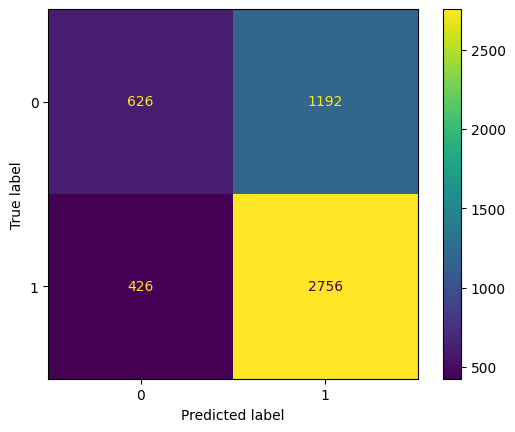

In [ ]:
# Evaluate the model
print("Results for the DecisionTreeClassifier------")
accuracy = classification_report(y_test, y_pred_dt)
rs_test = recall_score(y_test, y_pred_dt)
print("Recall Score - " + str(rs_test))
print(accuracy)

accuracy = classification_report(y_test, y_pred_dt,output_dict=True)
df_report = pd.DataFrame(accuracy).transpose()
df_report['Model'] = "DecisionTreeClassifier"
df_report['ModelAcc'] = rs_test
df_report.reset_index(inplace=True)
dfresults = pd.concat([dfresults,df_report])

cm = confusion_matrix(y_test, y_pred_dt, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()


In [ ]:
print('Accuracy:%.3f'%metrics.accuracy_score(y_test, y_pred_dt))
print('Recall:%.3f'%metrics.recall_score(y_test, y_pred_dt))
print('Precision:%.3f'%metrics.precision_score(y_test, y_pred_dt))
print('F1 Score:%.3f'%metrics.f1_score(y_test, y_pred_dt))
print('AUC:%.3f'%metrics.roc_auc_score(y_test, y_pred_dt))
print('DT Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

Accuracy:0.676
Recall:0.866
Precision:0.698
F1 Score:0.773
AUC:0.605
DT Confusion Matrix:
 [[ 626 1192]
 [ 426 2756]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.34      0.44      1818
           1       0.70      0.87      0.77      3182

    accuracy                           0.68      5000
   macro avg       0.65      0.61      0.60      5000
weighted avg       0.66      0.68      0.65      5000



**KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier()
# Fit the classifier to the data
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)

Results for the KNeighborsClassifier------
Recall Score - 0.8114393463230672
              precision    recall  f1-score   support

           0       0.54      0.38      0.45      1818
           1       0.70      0.81      0.75      3182

    accuracy                           0.66      5000
   macro avg       0.62      0.60      0.60      5000
weighted avg       0.64      0.66      0.64      5000



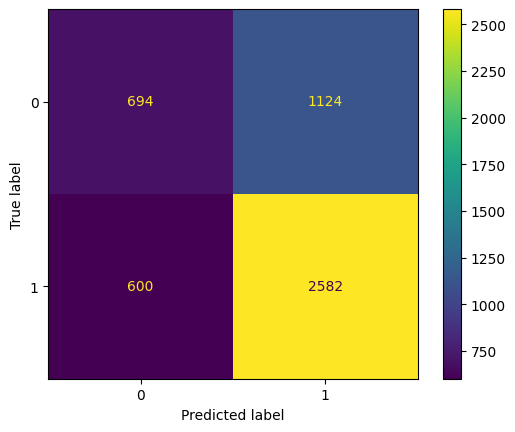

In [ ]:
# Evaluate the model
print("Results for the KNeighborsClassifier------")
accuracy = classification_report(y_test, y_pred_knn)
rs_test = recall_score(y_test, y_pred_knn)
print("Recall Score - " + str(rs_test))
print(accuracy)

accuracy = classification_report(y_test, y_pred_knn,output_dict=True)
df_report = pd.DataFrame(accuracy).transpose()
df_report['Model'] = "KNeighborsClassifier"
df_report['ModelAcc'] = rs_test
df_report.reset_index(inplace=True)
dfresults = pd.concat([dfresults,df_report])

cm = confusion_matrix(y_test, y_pred_knn, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()


In [ ]:
print('Accuracy:%.3f'%metrics.accuracy_score(y_test, y_pred_knn))
print('Recall:%.3f'%metrics.recall_score(y_test, y_pred_knn))
print('Precision:%.3f'%metrics.precision_score(y_test, y_pred_knn))
print('F1 Score:%.3f'%metrics.f1_score(y_test, y_pred_knn))
print('AUC:%.3f'%metrics.roc_auc_score(y_test, y_pred_knn))
print('KNN Confusion Matrix:\n', confusion_matrix(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

Accuracy:0.655
Recall:0.811
Precision:0.697
F1 Score:0.750
AUC:0.597
KNN Confusion Matrix:
 [[ 694 1124]
 [ 600 2582]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.38      0.45      1818
           1       0.70      0.81      0.75      3182

    accuracy                           0.66      5000
   macro avg       0.62      0.60      0.60      5000
weighted avg       0.64      0.66      0.64      5000



**SVC(RBF)**

In [ ]:
#SVM RBF classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train_scaled, y_train)
y_pred_svm = svclassifier.predict(X_test_scaled)


Results for the SVC------
Recall Score - 0.9022627278441232
              precision    recall  f1-score   support

           0       0.60      0.25      0.36      1818
           1       0.68      0.90      0.78      3182

    accuracy                           0.67      5000
   macro avg       0.64      0.58      0.57      5000
weighted avg       0.65      0.67      0.62      5000



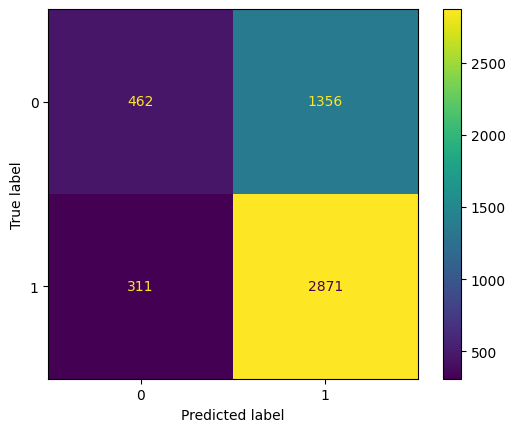

In [ ]:
# Evaluate the model
print("Results for the SVC------")
accuracy = classification_report(y_test, y_pred_svm)
rs_test = recall_score(y_test, y_pred_svm)
print("Recall Score - " + str(rs_test))
print(accuracy)

accuracy = classification_report(y_test, y_pred_svm,output_dict=True)
df_report = pd.DataFrame(accuracy).transpose()
df_report['Model'] = "SVC"
df_report['ModelAcc'] = rs_test
df_report.reset_index(inplace=True)
dfresults = pd.concat([dfresults,df_report])

cm = confusion_matrix(y_test, y_pred_svm, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()


In [ ]:
print('Accuracy:%.3f'%metrics.accuracy_score(y_test, y_pred_svm))
print('Recall:%.3f'%metrics.recall_score(y_test, y_pred_svm))
print('Precision:%.3f'%metrics.precision_score(y_test, y_pred_svm))
print('F1 Score:%.3f'%metrics.f1_score(y_test, y_pred_svm))
print('AUC:%.3f'%metrics.roc_auc_score(y_test, y_pred_svm))
print('SVM Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

Accuracy:0.667
Recall:0.902
Precision:0.679
F1 Score:0.775
AUC:0.578
SVM Confusion Matrix:
 [[ 462 1356]
 [ 311 2871]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.25      0.36      1818
           1       0.68      0.90      0.78      3182

    accuracy                           0.67      5000
   macro avg       0.64      0.58      0.57      5000
weighted avg       0.65      0.67      0.62      5000



**BernoulliNB**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train_scaled, y_train)
y_pred_bnb = bnb.predict(X_test_scaled)

Results for the BernoulliNB------
Recall Score - 0.9028912633563796
              precision    recall  f1-score   support

           0       0.62      0.28      0.39      1818
           1       0.69      0.90      0.78      3182

    accuracy                           0.68      5000
   macro avg       0.65      0.59      0.58      5000
weighted avg       0.66      0.68      0.64      5000



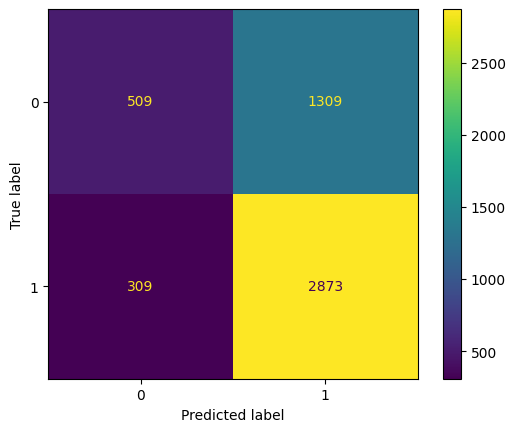

In [ ]:
# Evaluate the model
print("Results for the BernoulliNB------")
accuracy = classification_report(y_test, y_pred_bnb)
rs_test = recall_score(y_test, y_pred_bnb)
print("Recall Score - " + str(rs_test))
print(accuracy)

accuracy = classification_report(y_test, y_pred_bnb,output_dict=True)
df_report = pd.DataFrame(accuracy).transpose()
df_report['Model'] = "BernoulliNB"
df_report['ModelAcc'] = rs_test
df_report.reset_index(inplace=True)
dfresults = pd.concat([dfresults,df_report])

cm = confusion_matrix(y_test, y_pred_bnb, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()


In [ ]:
print('Accuracy:%.3f'%metrics.accuracy_score(y_test, y_pred_bnb))
print('Recall:%.4f'%metrics.recall_score(y_test, y_pred_bnb))
print('Precision:%.3f'%metrics.precision_score(y_test, y_pred_bnb))
print('F1 Score:%.3f'%metrics.f1_score(y_test, y_pred_bnb))
print('AUC:%.3f'%metrics.roc_auc_score(y_test, y_pred_bnb))
print('NB Confusion Matrix:\n', confusion_matrix(y_test, y_pred_bnb))
print('Classification Report:\n', classification_report(y_test, y_pred_bnb))

Accuracy:0.676
Recall:0.9029
Precision:0.687
F1 Score:0.780
AUC:0.591
NB Confusion Matrix:
 [[ 509 1309]
 [ 309 2873]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.28      0.39      1818
           1       0.69      0.90      0.78      3182

    accuracy                           0.68      5000
   macro avg       0.65      0.59      0.58      5000
weighted avg       0.66      0.68      0.64      5000



**Model Evaluation & Selection**

In [ ]:
dfresults

,index,precision,recall,f1-score,support,Model,ModelAcc
0,0,0.617788,0.282728,0.387925,1818.0000,LogisticRegression,0.900063
1,1,0.687140,0.900063,0.779320,3182.0000,LogisticRegression,0.900063
2,accuracy,0.675600,0.675600,0.675600,0.6756,LogisticRegression,0.900063
3,macro avg,0.652464,0.591396,0.583622,5000.0000,LogisticRegression,0.900063
4,weighted avg,0.661924,0.675600,0.637008,5000.0000,LogisticRegression,0.900063
0,0,0.595057,0.344334,0.436237,1818.0000,DecisionTreeClassifier,0.866122
1,1,0.698075,0.866122,0.773072,3182.0000,DecisionTreeClassifier,0.866122
2,accuracy,0.676400,0.676400,0.676400,0.6764,DecisionTreeClassifier,0.866122
3,macro avg,0.646566,0.605228,0.604654,5000.0000,DecisionTreeClassifier,0.866122
4,weighted avg,0.660618,0.676400,0.650598,5000.0000,DecisionTreeClassifier,0.866122


**Choose model with Highest Recall Score - and True/False Positive as our Priority - In Healthcare**
False Positive is more important than False Negative as User have a upper hand to do lab test
Model Accuracy is Recall score value

In [ ]:
dfresults[dfresults['index']=='accuracy'].sort_values(by=['ModelAcc'],ascending=False)

,index,precision,recall,f1-score,support,Model,ModelAcc
2,accuracy,0.6764,0.6764,0.6764,0.6764,BernoulliNB,0.902891
2,accuracy,0.6666,0.6666,0.6666,0.6666,SVC,0.902263
2,accuracy,0.6756,0.6756,0.6756,0.6756,LogisticRegression,0.900063
2,accuracy,0.6764,0.6764,0.6764,0.6764,DecisionTreeClassifier,0.866122
2,accuracy,0.6552,0.6552,0.6552,0.6552,KNeighborsClassifier,0.811439


**Hyper Parameter Tunning - For BernoulliNB**

In [ ]:
bnb.get_params()

{'alpha': 1.0,
 'binarize': 0.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn'}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'alpha': [1000],# Minimum Value to create a smoothing
}


bnb_model = BernoulliNB()

bnb_gs = GridSearchCV(bnb_model, param_grid, cv=5, scoring='recall_weighted')
# Fit the model to the data
bnb_gs.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = bnb_gs.best_params_

# Use the best model for predictions
best_model = bnb_gs.best_estimator_
print(best_params)

y_pred_bnb_gs=best_model.predict(X_test_scaled)

{'alpha': 1000}


Results for the BernoulliNB------
Recall Score - 0.9396605908233815
              precision    recall  f1-score   support

           0       0.66      0.21      0.31      1818
           1       0.67      0.94      0.79      3182

    accuracy                           0.67      5000
   macro avg       0.67      0.57      0.55      5000
weighted avg       0.67      0.67      0.61      5000



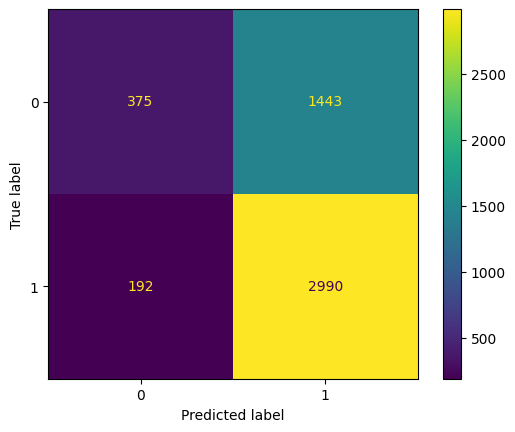

In [ ]:

# Evaluate the model
print("Results for the BernoulliNB------")
accuracy = classification_report(y_test, y_pred_bnb_gs)
rs_test = recall_score(y_test, y_pred_bnb_gs)
print("Recall Score - " + str(rs_test))
print(accuracy)

cm = confusion_matrix(y_test, y_pred_bnb_gs, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()


**Ensemble Other Weak Models**

SVC requires predict_proba So Let's skip to another weak models

In [ ]:
dfresults[dfresults['index']=='accuracy'].sort_values(by=['ModelAcc'],ascending=False)

,index,precision,recall,f1-score,support,Model,ModelAcc
2,accuracy,0.6764,0.6764,0.6764,0.6764,BernoulliNB,0.902891
2,accuracy,0.6666,0.6666,0.6666,0.6666,SVC,0.902263
2,accuracy,0.6756,0.6756,0.6756,0.6756,LogisticRegression,0.900063
2,accuracy,0.6764,0.6764,0.6764,0.6764,DecisionTreeClassifier,0.866122
2,accuracy,0.6552,0.6552,0.6552,0.6552,KNeighborsClassifier,0.811439


In [ ]:
from sklearn.ensemble import VotingClassifier
# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('LogisticRegression', logreg),
    ('DecisionTreeClassifier', clf)
], voting='soft')

In [ ]:
# Fit the ensemble model
voting_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_ens = voting_classifier.predict(X_test_scaled)

Results for the Ensemble------
Recall Score - 0.9016341923318667
              precision    recall  f1-score   support

           0       0.64      0.31      0.41      1818
           1       0.69      0.90      0.78      3182

    accuracy                           0.68      5000
   macro avg       0.67      0.60      0.60      5000
weighted avg       0.67      0.68      0.65      5000



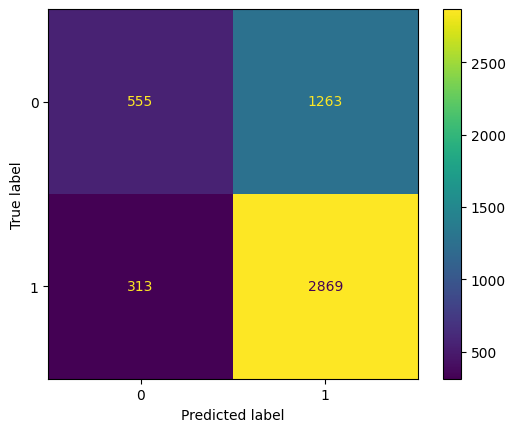

In [ ]:

# Evaluate the model
print("Results for the Ensemble------")
accuracy = classification_report(y_test, y_pred_ens)
rs_test = recall_score(y_test, y_pred_ens)
print("Recall Score - " + str(rs_test))
print(accuracy)

cm = confusion_matrix(y_test, y_pred_ens, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()
